RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

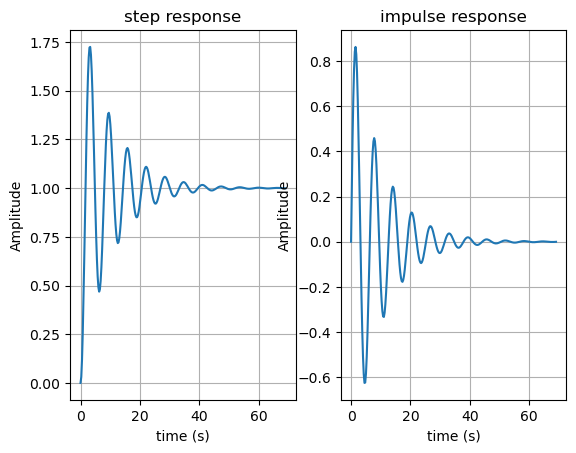

In [71]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

sys6 = ctrl.tf(1,[1,0.2,1])	# 二阶系统，自然谐振频率为1，阻尼比为0.1，衰减振荡
t1,y1 = ctrl.step_response(sys6)
t2,y2 = ctrl.impulse_response(sys6)

plt.subplot(121)
plt.plot(t1, y1)
plt.title('step response')
plt.ylabel('Amplitude')
plt.xlabel('time (s)')
plt.grid(1)
 
plt.subplot(122)
plt.plot(t2, y2)
plt.title('impulse response')
plt.ylabel('Amplitude')
plt.xlabel('time (s)')
plt.grid(1)

plt.show()


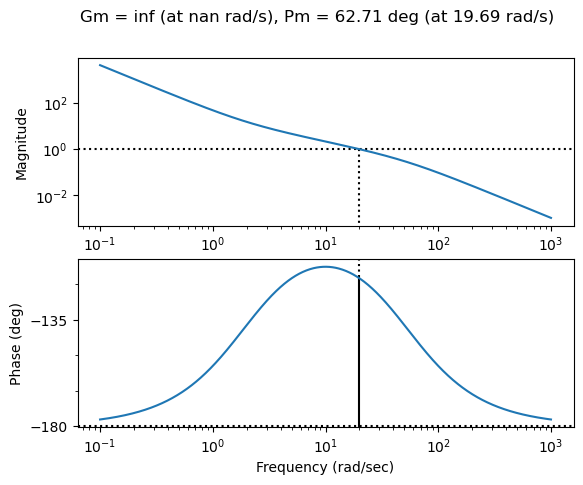

In [14]:
import control as ct
m = 4
J = 0.0475
r = 0.25
g = 9.8
c = 0.05

# System parameters

Pi = ct.tf([r], [J, 0, 0]) # inner loop (roll)
Po = ct.tf([1], [m, c, 0]) # outer loop (posn)

k_i, a_i, b_i = 200, 2, 50
Ci = k_i * ct.tf([1, a_i], [1, b_i])
Li = Pi * Ci

plt.figure(); ct.bode_plot(Li, margins=True)
plt.show()

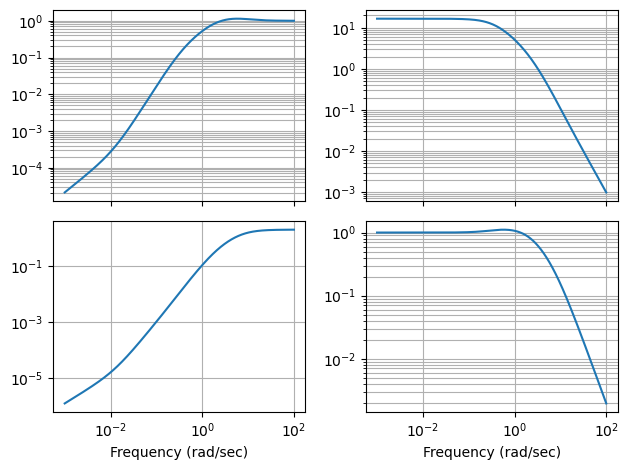

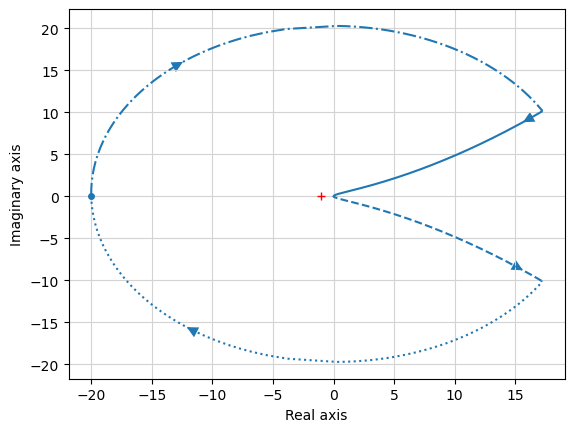

In [16]:
# Design lateral control system (lead compensator)
a_o, b_o, k_o = 0.3, 10, 2
Co = -k_o * ct.tf([1, a_o], [1, b_o])
Lo = -m * g * Po * Co

# Compute real outer-loop loop transfer function
L = Co *  Po
# We can analyze the results using Bode plots, Nyquist plots and time domain sim-
# ulations:
# Compute stability margins
gm, pm, wgc, wpc = ct.margin(L)
# Check to make sure that the specification is met
plt.figure(); ct.gangof4_plot(-m * g * Po, Co)
# Nyquist plot for complete design
plt.figure(); ct.nyquist_plot(L)
plt.show()


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

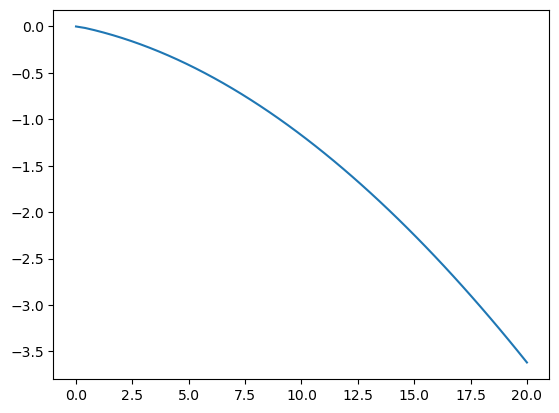

In [19]:
# Step response
t, y = ct.step_response(L, np.linspace(0, 20))
plt.figure(); plt.plot(t, y)
plt.savefig('pvtol-step.pdf')

In [24]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# 系统矩阵
A = np.array([[0, 1], [-1, 0.1]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])

# 判断可控性
Ctrb = ctl.ctrb(A, B)
rank_of_ctrb = np.linalg.matrix_rank(Ctrb)
print(Ctrb)

[[0.  1. ]
 [1.  0.1]]


系统是可控的


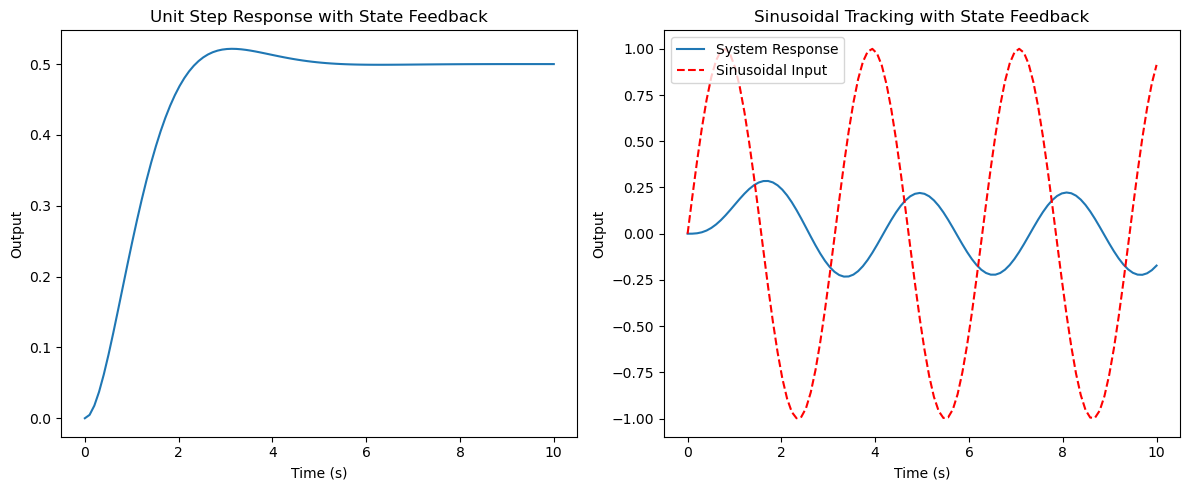

In [27]:

if rank_of_ctrb == A.shape[0]:
    print("系统是可控的")
    # 期望的闭环极点
    desired_poles = np.array([-1+1j, -1-1j])

    # 计算反馈增益K
    K = ctl.place(A, B, desired_poles)
    
    # 新的状态空间表示（闭环）
    A_cl = A - np.dot(B, K)
    sys_cl = ctl.StateSpace(A_cl, B, C, 0)
    
    # 模拟时间
    t = np.linspace(0, 10, 100)
    
    # 跟踪常数信号：单位阶跃响应
    t1, y1 = ctl.step_response(sys_cl, t)
    
    # 跟踪正弦信号
    # 生成正弦输入
    sin_input = np.sin(2*t)
    t2, y2 = ctl.forced_response(sys_cl, t, sin_input)

    # 绘图显示
    plt.figure(figsize=(12, 5))
    
    # 绘制单位阶跃响应
    plt.subplot(1, 2, 1)
    plt.plot(t1, y1)
    plt.title('Unit Step Response with State Feedback')
    plt.xlabel('Time (s)')
    plt.ylabel('Output')
    
    # 绘制正弦信号跟踪响应
    plt.subplot(1, 2, 2)
    plt.plot(t2, y2, label='System Response')
    plt.plot(t, sin_input, 'r--', label='Sinusoidal Input')
    plt.legend()
    plt.title('Sinusoidal Tracking with State Feedback')
    plt.xlabel('Time (s)')
    plt.ylabel('Output')
    
    plt.tight_layout()
    plt.show()

else:
    print(f"系统不可控，其可控矩阵的秩是 {rank_of_ctrb}，而不是 {A.shape[0]}")


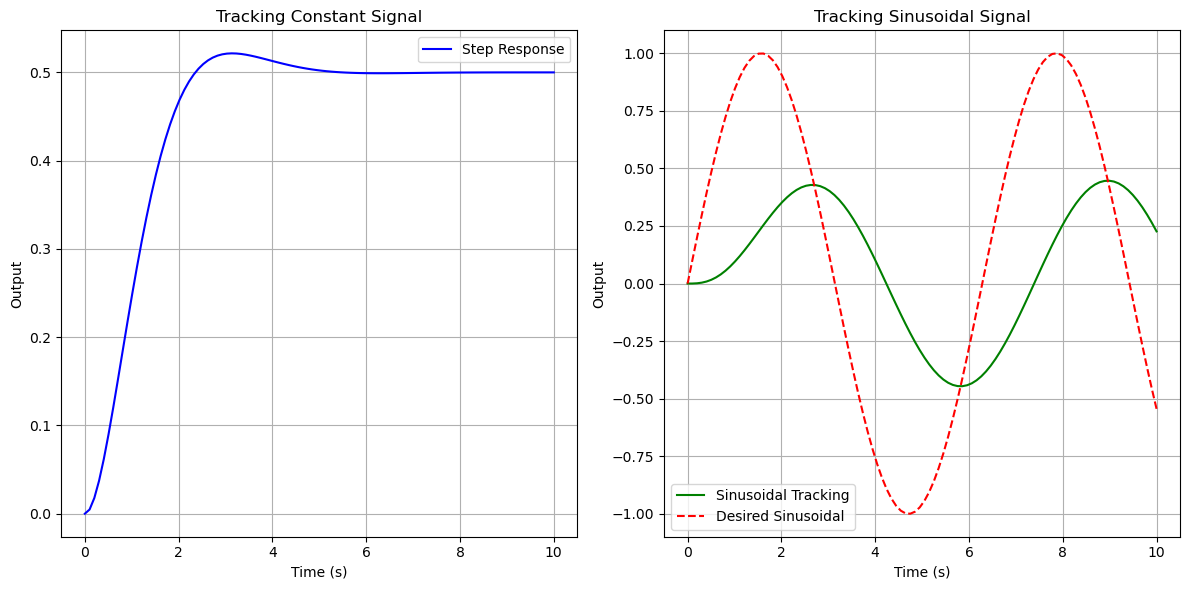

In [76]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# 系统矩阵
A = np.array([[0, 1], [-1, -0.1]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])

# 计算可控性矩阵并检查其秩
controllability_matrix = ctl.ctrb(A, B)
rank_of_controllability = np.linalg.matrix_rank(controllability_matrix)

# 检查系统是否完全可控
if rank_of_controllability != A.shape[0]:
    print("系统不可控，控制器设计不能进行。")
else:
    # 选择合适的极点位置
    desired_poles = np.array([-1+1j, -1-1j])

    # 计算状态反馈增益K
    K = ctl.place(A, B, desired_poles)

    # 使用状态反馈得到闭环系统
    A_cl = A - B.dot(K)
    sys_cl = ctl.StateSpace(A_cl, B, C, 0)

    # 设置仿真时间
    t = np.linspace(0, 10, 100)

    # 跟踪常数信号：单位阶跃响应
    # t_step, y_step = ctl.step_response(sys_cl, t)
    U_step = np.ones_like(t)  # 单位阶跃输入作为参考信号
    t_step, y_step = ctl.forced_response(sys_cl, t, U=U_step)

    # 跟踪正弦信号
    sin_input = np.sin(t)
    _, y_sin = ctl.forced_response(sys_cl, t, U=sin_input)

    # 绘制控制效果
    plt.figure(figsize=(12, 6))

    # 绘制常数信号跟踪效果
    plt.subplot(1, 2, 1)
    plt.plot(t_step, y_step, 'b-', label='Step Response')
    plt.title('Tracking Constant Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Output')
    plt.grid(True)
    plt.legend()

    # 绘制正弦信号跟踪效果
    plt.subplot(1, 2, 2)
    plt.plot(t, y_sin, 'g-', label='Sinusoidal Tracking')
    plt.plot(t, sin_input, 'r--', label='Desired Sinusoidal')
    plt.title('Tracking Sinusoidal Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Output')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [80]:
import numpy as np
import control.matlab as ctrl

# 定义系统矩阵
A = np.array([[0, 1],
              [-1, -0.1]])
B = np.array([[0],
              [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

# 创建状态空间模型
sys = ctrl.ss(A, B, C, D)

# 选择性能指标（例如，希望的极点位置）
desired_poles = np.array([-1 + 1j, -1 - 1j])

# 计算状态反馈增益
K = ctrl.place(A, B, desired_poles)

print("反馈增益K: ", K)

# 如果稳态误差较大，则添加积分控制
# 扩展系统矩阵以引入积分项
Ai = np.block([
    [A, np.zeros((2, 1))],
    [-C, np.zeros((1, 1))]
])
Bi = np.block([
    [B],
    [-D]
])

Ci = np.hstack([C, np.zeros((1, 1))])

# 重新设计极点以包括积分效果
desired_poles_with_integrator = np.array([-1 + 1j, -1 - 1j, -1])

# 计算新的状态反馈增益
Ki = ctrl.place(Ai, Bi, desired_poles_with_integrator)

print("包含积分项的反馈增益Ki: ", Ki)


反馈增益K:  [[1.  1.9]]
包含积分项的反馈增益Ki:  [[ 3.   2.9 -2. ]]


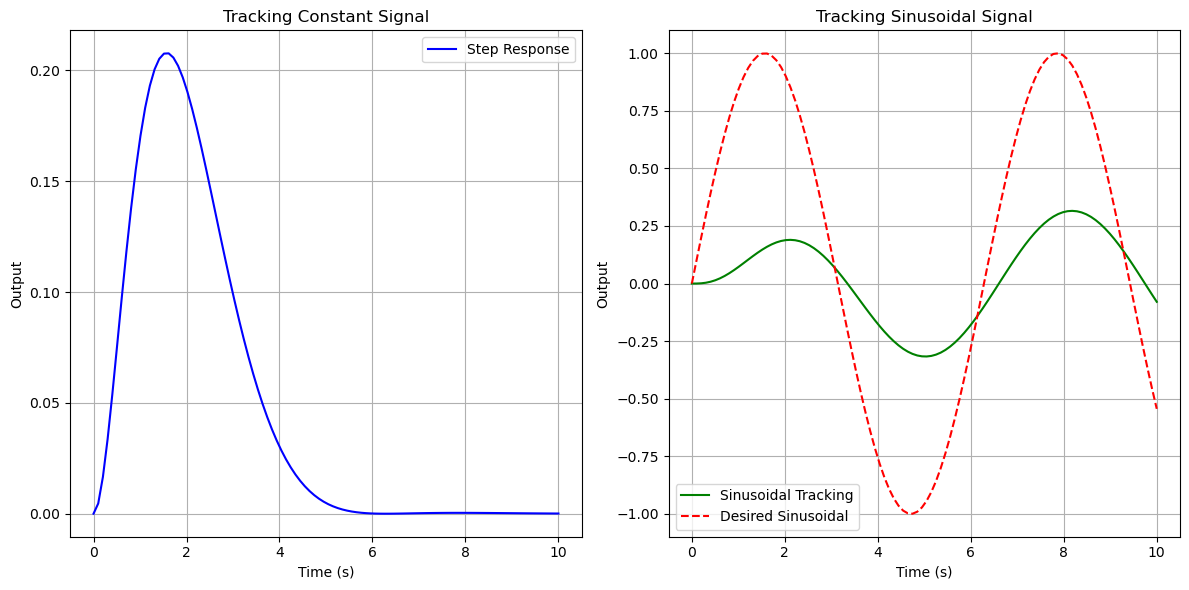

In [81]:
# 使用状态反馈得到闭环系统
A_cl = Ai - Bi.dot(Ki)
sys_cl = ctl.StateSpace(A_cl, Bi, Ci, 0)

# 设置仿真时间
t = np.linspace(0, 10, 100)

# 跟踪常数信号：单位阶跃响应
t_step, y_step = ctl.step_response(sys_cl, t)

# 跟踪正弦信号
sin_input = np.sin(t)
_, y_sin = ctl.forced_response(sys_cl, t, U=sin_input)

# 绘制控制效果
plt.figure(figsize=(12, 6))

# 绘制常数信号跟踪效果
plt.subplot(1, 2, 1)
plt.plot(t_step, y_step, 'b-', label='Step Response')
plt.title('Tracking Constant Signal')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

# 绘制正弦信号跟踪效果
plt.subplot(1, 2, 2)
plt.plot(t, y_sin, 'g-', label='Sinusoidal Tracking')
plt.plot(t, sin_input, 'r--', label='Desired Sinusoidal')
plt.title('Tracking Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [82]:
Ci

array([[1., 0., 0.]])

反馈增益K:  [[1.  1.9]]
包含积分项的反馈增益Ki:  [[ 3.   2.9 -2. ]]


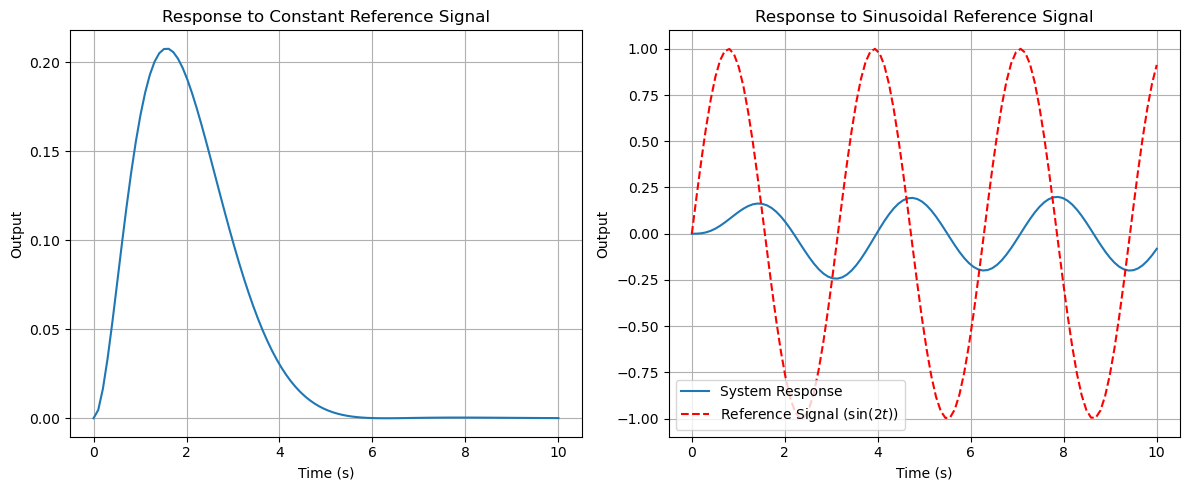

In [83]:
import numpy as np
import control.matlab as ctrl
import matplotlib.pyplot as plt

# 定义系统矩阵
A = np.array([[0, 1],
              [-1, -0.1]])
B = np.array([[0],
              [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

# 创建状态空间模型
sys = ctrl.ss(A, B, C, D)

# 选择性能指标（例如，希望的极点位置）
desired_poles = np.array([-1 + 1j, -1 - 1j])

# 计算状态反馈增益
K = ctrl.place(A, B, desired_poles)

print("反馈增益K: ", K)

# 如果稳态误差较大，则添加积分控制
# 扩展系统矩阵以引入积分项
Ai = np.block([
    [A, np.zeros((2, 1))],
    [-C, np.zeros((1, 1))]
])
Bi = np.block([
    [B],
    [-D]
])
Ci = np.hstack([C, np.zeros((1, 1))])
Di = np.zeros((1, 1))

# 重新设计极点以包括积分效果
desired_poles_with_integrator = np.array([-1 + 1j, -1 - 1j, -1])

# 计算新的状态反馈增益
Ki = ctrl.place(Ai, Bi, desired_poles_with_integrator)

print("包含积分项的反馈增益Ki: ", Ki)

# 使用状态反馈得到闭环系统
A_cl = Ai - Bi.dot(Ki)
B_cl = Bi
C_cl = Ci
D_cl = Di

sys_cl = ctrl.StateSpace(A_cl, B_cl, C_cl, D_cl)

# 设置仿真时间
t = np.linspace(0, 10, 100)

# 跟踪常数信号：单位阶跃响应
# 添加一个额外的一维，因为现在有一个新增的积分状态
U_step = np.ones_like(t)  # 单位阶跃输入作为参考信号
t_step, y_step = ctl.forced_response(sys_cl, t, U=U_step)

# 跟踪正弦信号
sin_input = np.sin(2 * t)  # 参考信号是 sin(2t)
_, y_sin = ctl.forced_response(sys_cl, t, U=sin_input)

# 绘制响应图
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t_step, y_step)
plt.title('Response to Constant Reference Signal')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, y_sin, label='System Response')
plt.plot(t, sin_input, 'r--', label='Reference Signal ($\sin(2t)$)')
plt.legend()
plt.title('Response to Sinusoidal Reference Signal')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.tight_layout()
plt.show()


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

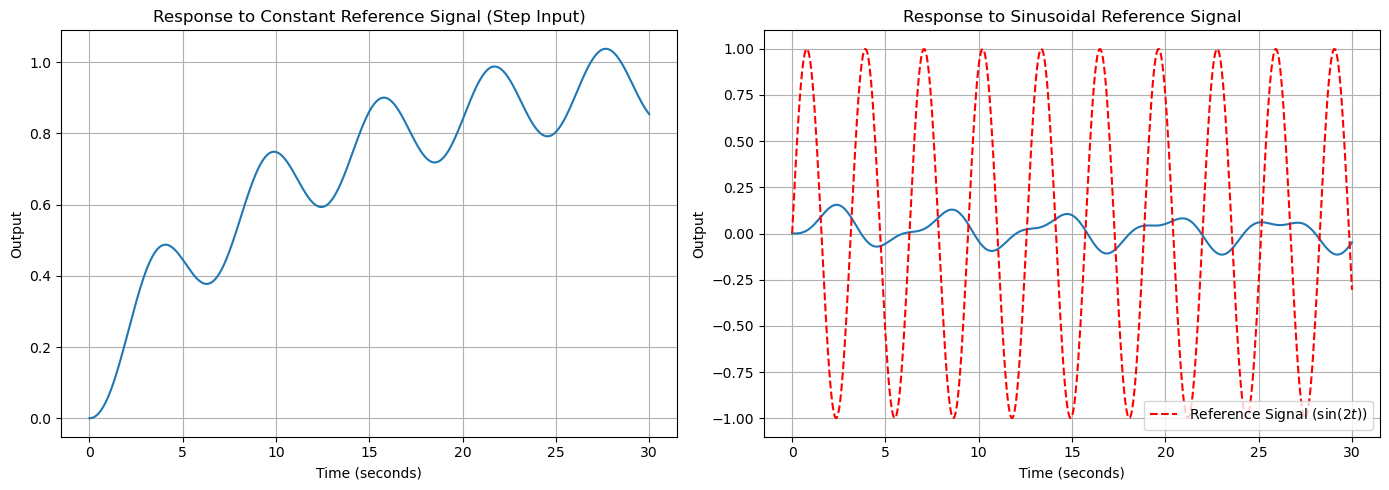

In [109]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# 系统矩阵
A = np.array([[0, 1],
              [-1, -0.1]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

# 创建状态空间模型
# sys = ctrl.ss(A, B, C, D)
sys = ctrl.tf(1,[1,0.1,1])	

# 设计PI控制器参数
Kp = 0.1  # 比例增益
Ki = 0.1   # 积分增益

# 构建传递函数G(s) = Kp + Ki/s
Gc_s = ctrl.TransferFunction([Kp, Ki], [1, 0])

# 打开环路传递函数
open_loop = ctrl.series(Gc_s, sys)

# 闭环传递函数
closed_loop = ctrl.feedback(open_loop)

# 设置仿真时间
t = np.linspace(0, 30, 500)

# 响应单位阶跃输入
U_step = np.ones_like(t)  # 单位阶跃输入作为参考信号
t_step, y_step = ctl.forced_response(closed_loop, t, U=U_step)

# 响应sin(2t)输入
t_sin, y_sin = ctrl.forced_response(closed_loop, t, U=np.sin(2*t))

# 绘图
plt.figure(figsize=(14, 5))

# 绘制单位阶跃响应
plt.subplot(1, 2, 1)
plt.plot(t_step, y_step)
plt.title('Response to Constant Reference Signal (Step Input)')
plt.xlabel('Time (seconds)')
plt.ylabel('Output')
plt.grid(True)

# 绘制正弦输入响应
plt.subplot(1, 2, 2)
plt.plot(t_sin, y_sin)
plt.plot(t_sin, np.sin(2*t_sin), 'r--', label='Reference Signal ($\sin(2t)$)')
plt.legend()
plt.title('Response to Sinusoidal Reference Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Output')
plt.grid(True)

plt.tight_layout()
plt.show()


In [69]:
open_loo

<LinearICSystem:sys[176]:['u[0]']->['y[0]']>

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

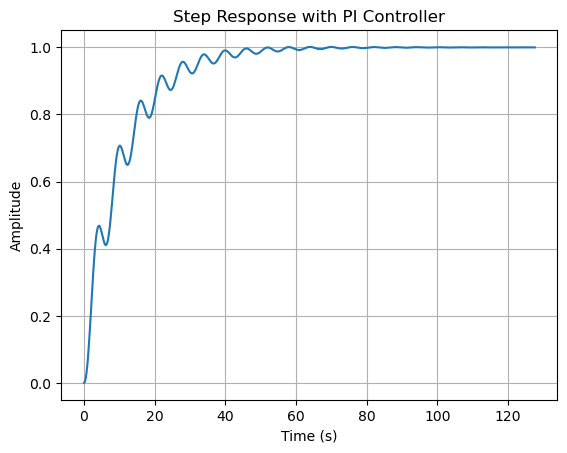

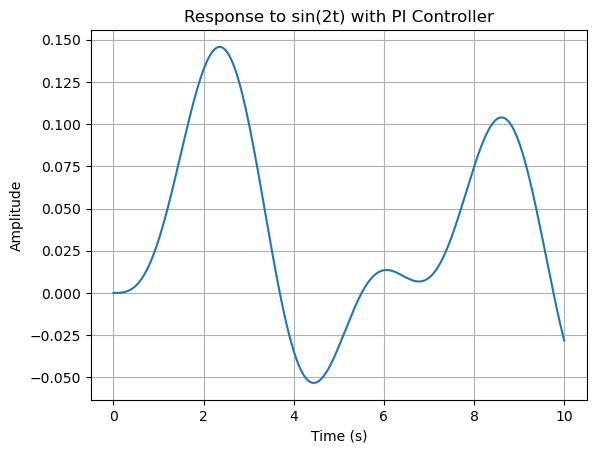

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# 给定的系统
sys = ctrl.tf(1, [1, 0.1, 1])

# 设计PI控制器的参数，这里假设了一组参数，实际情况下需要结合系统特性来调整
Kp = 0.1  # 比例增益
Ki = 0.1   # 积分增益

# PI控制器的传递函数
PI = ctrl.tf([Kp, Ki], [1, 0])

# 计算闭环传递函数
closed_loop_sys = ctrl.feedback(PI * sys)

# 绘制阶跃响应
plt.figure()
time_step_response, y_step_response = ctrl.step_response(closed_loop_sys)
plt.plot(time_step_response, y_step_response)
plt.title('Step Response with PI Controller')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# 绘制对sin(2t)的响应
plt.figure()
T = np.linspace(0, 10, 1000)  # 总时间为10秒，点数根据所需精度设置
u_sin = np.sin(2 * T)  # 正弦输入
_, y_sin_response = ctrl.forced_response(closed_loop_sys, T, u_sin)
plt.plot(T, y_sin_response)
plt.title('Response to sin(2t) with PI Controller')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# 显示所有绘制的图形
plt.show()


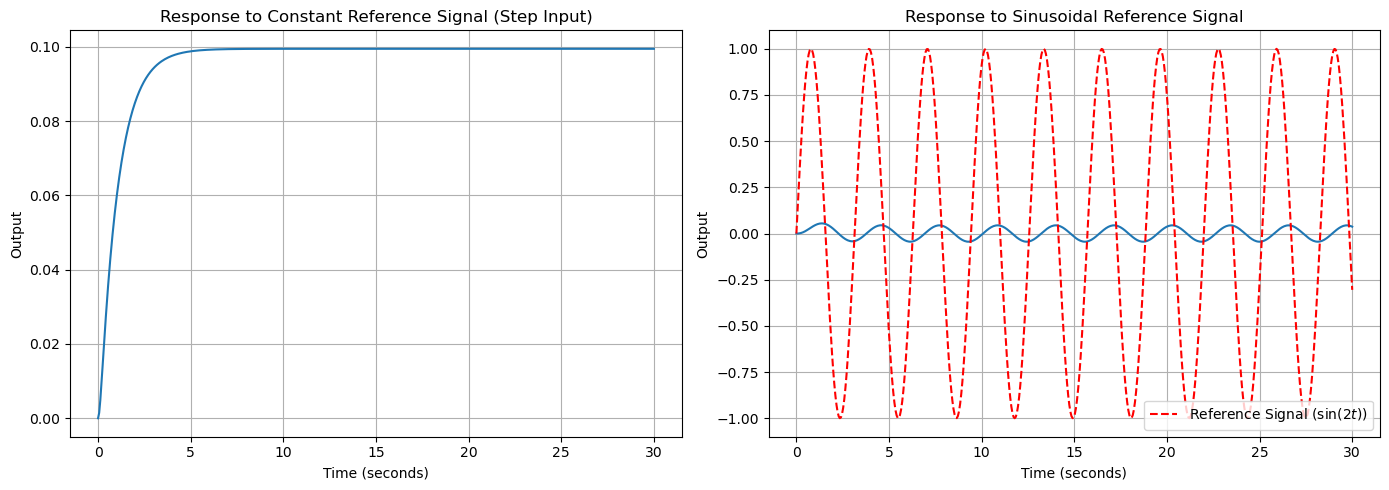

In [117]:
# 系统矩阵
A = np.array([[0, 1],
              [-1, -0.1]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

# 创建状态空间模型
sys_ss = ctrl.ss(A, B, C, D)

# 将传递函数转换为状态空间表示
# sys_ss = ctrl.tf2ss(sys)

# 确定LQR的权重矩阵Q和R
Q = np.diag([1, 1])  # 例如，权重矩阵是一个对角矩阵，实际情况下应该根据具体需求调整
R = np.array([[0.01]])  # 输入权重

# 计算LQR增益矩阵K
K, _, _ = ctrl.lqr(sys_ss, Q, R)

# 状态空间的全状态反馈系统（用A-BK代替A）
Ac = sys_ss.A - np.dot(sys_ss.B, K)
Bc = sys_ss.B
Cc = sys_ss.C
Dc = sys_ss.D
sys_cl = ctrl.ss(Ac, Bc, Cc, Dc)

# 响应单位阶跃输入
U_step = np.ones_like(t)  # 单位阶跃输入作为参考信号
t_step, y_step = ctl.forced_response(sys_cl, t, U=U_step)

# 响应sin(2t)输入
t_sin, y_sin = ctrl.forced_response(sys_cl, t, U=np.sin(2*t))

# 绘图
plt.figure(figsize=(14, 5))

# 绘制单位阶跃响应
plt.subplot(1, 2, 1)
plt.plot(t_step, y_step)
plt.title('Response to Constant Reference Signal (Step Input)')
plt.xlabel('Time (seconds)')
plt.ylabel('Output')
plt.grid(True)

# 绘制正弦输入响应
plt.subplot(1, 2, 2)
plt.plot(t_sin, y_sin)
plt.plot(t_sin, np.sin(2*t_sin), 'r--', label='Reference Signal ($\sin(2t)$)')
plt.legend()
plt.title('Response to Sinusoidal Reference Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Output')
plt.grid(True)

plt.tight_layout()
plt.show()
